<a href="https://colab.research.google.com/github/Kapoortigers007/Pankaj_Google_Play_Store_App_Review_Analysis/blob/main/Pankaj_Google_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Play Store App Review Analysis** :- Google Play is known as the Google Play Store. It is the official distribution storefront for all Android applications and other digital media, such as music, movies and books from Google.
#Google has released a timeline of apps and games that transformed the lives of individuals over the last 10 years.

We have two datasets one containing the information about apps and the other consist of the user reviews and their sentiments about the apps. Our goal is to analyze the dataset and visualize the trends and relations between app features. There are many questions an app developer could come across while developing an app and our study will help in answering those questions. Our analysis is divided into three phases:

1. Understanding data : Loading the dataset as dataframe.
2. Data preparation : Cleaning and Extracting essential data.
3. Data visualization : Exploratory analysis and visualizations.
4.Conclusion.

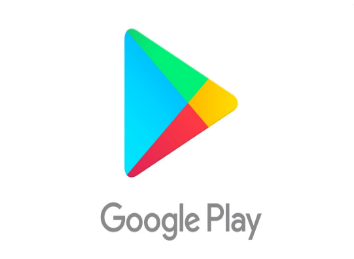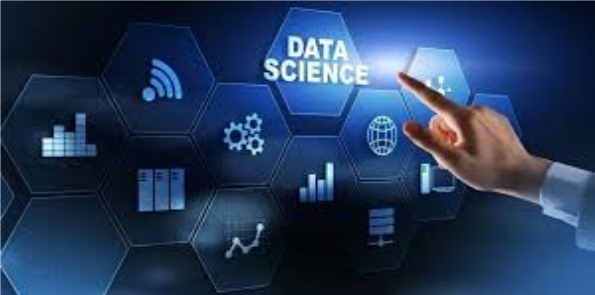


In [ ]:
# importing following libraries :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Mounting drive :
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Base directory where datasets are stored
base_path = "/content/drive/My Drive/2026/Capstone Project/Module II Numerical Programming in Python/"

In [ ]:
# Importing Data set
apps_df = pd.read_csv('/content/drive/My Drive/2026/Capstone Project/Module II Numerical Programming in Python/Play Store Data.csv')
reviews_df = pd.read_csv('/content/drive/My Drive/2026/Capstone Project/Module II Numerical Programming in Python/User Reviews.csv')

In [ ]:
apps_data = apps_df.copy()

#Data Understanding :

Data understanding is very crucial for analysing the data set.So first we have to understand the data structure and hpow data is organized.


In [ ]:
# Have a look for top 5 rows :
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Now last 5 rows :
apps_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# Lets find shape of dataset:
apps_data.shape

(10841, 13)

In [ ]:
# Features are :
apps_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Basic info
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


#Observation of above data understanding :
We can observe that, our dataset contains the data of about 10841 apps found on the play store.
Dataset has 13 columns which are the parameters of the apps i.e.,
App, Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating, Genres,Last Updated,Current Ver,Android Ver :

#Data Preparation
Cleaning and transforming raw data prior to processing and analysis.Good data preparation allows for efficient analysis, limit errors that can occur to data during processing.

<Axes: >

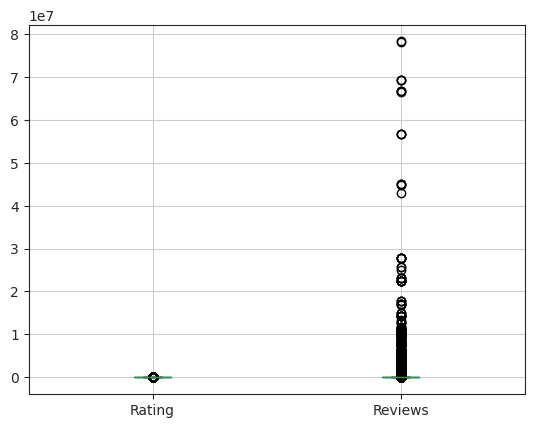

In [ ]:
#Finding Outliers
apps_data.boxplot()

In [ ]:
# Finding duplicates :
apps_data["App"].duplicated().any()

np.True_

In [ ]:
# Deleting duplicates :
apps_data.drop_duplicates("App", inplace=True)

In [ ]:
# shape after droping duplicates
apps_data.shape

(9660, 13)

In [ ]:
# checking the columns which have missing values
columns_with_missing_values = apps_data.columns[apps_data.isnull().any()]
apps_data[columns_with_missing_values].isnull().sum()

,0
Rating,1463
Type,1
Genres,1
Current Ver,8
Android Ver,2


In [ ]:
# looking at missing values in column Type
apps_data[apps_data['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# filling missing data in city column
apps_data['Type'].fillna('Free', inplace= True)

/tmp/ipython-input-2393142124.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_data['Type'].fillna('Free', inplace= True)


In [ ]:
# looking at missing values in column Content Rating
apps_data[apps_data['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# droping the missing value row
apps_data.dropna(subset=['Content Rating'], inplace= True)

In [ ]:
# droping unnecessary columns
apps_data.drop(columns=['Android Ver','Current Ver'], axis= 1, inplace= True)

Now looking at the missing values of Rating column. There are 1463 values which are missing. This ratings are given by the users, so we cannot predict anything to fill :

/tmp/ipython-input-2403791420.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(apps_data['Rating']);


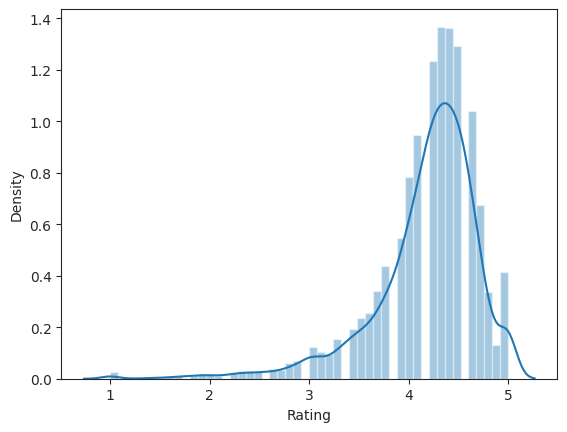

In [ ]:
# plot distribution of rating
sns.distplot(apps_data['Rating']);

The distribution of the rating interprets negatively skewed distribution as more values are concentrated towards the right side of the plot. In skewed distributions, the median is the best measure because it is unaffected by extreme outliers or non-symmetric distributions of scores.

Replace the missing values with the median value of the column.

In [ ]:
# calculating median value
median_value = apps_data['Rating'].median()
median_value

4.3

In [ ]:
# replacing the missing values with median value
apps_data['Rating'].fillna(median_value, inplace= True)

/tmp/ipython-input-2734142181.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_data['Rating'].fillna(median_value, inplace= True)


In [ ]:
# checking the count of missing values
apps_data.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,1


In [ ]:
# checking data types
apps_data.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


Columns like Reviews, Size, Installs, Price are of object type so  we can change their data type to integer/float.

Let's start with changing **Reviews** column from object to integer.

In [ ]:
# changing data type of column Reviews
apps_data['Reviews'] = apps_data.Reviews.astype(int)

Now changing the type of the **Size** column. First looking at the unique values in the column.

In [ ]:
# checking unique values in Size column
apps_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
# removing M and replacing K with e-3
apps_data['Size'] = apps_data['Size'].apply(lambda x: x.replace('M', ''))
apps_data['Size'] = apps_data['Size'].apply(lambda x: x.replace('k', 'e-3'))
apps_data = apps_data[apps_data['Size'] != 'Varies with device']

# changing the type of Size column
apps_data['Size'] = apps_data['Size'].astype(float)

To change the type of **Installs** column first we have to remove the special character **'+'** and **','** from the values.

In [ ]:
# removing special characters
apps_data['Installs'] = apps_data['Installs'].apply(lambda x: x.replace('+', ''))
apps_data['Installs'] = apps_data['Installs'].apply(lambda x: x.replace(',', ''))

# changing the type of Installs column
apps_data['Installs'] = apps_data['Installs'].astype(int)

Now changing the type of **Price** column to float. First, we have remove the special character **'$'**.

In [ ]:
# removing $ and changing the type of Price column
apps_data['Price'] = apps_data['Price'].apply(lambda x: x.replace('$', ''))
apps_data['Price'] = apps_data['Price'].astype(float)

Now looking at the **last updated** column it contains the date on which the app is updated/launched last time. It is of object type so we have to convert date in the date-time format.

In [ ]:
# converting 'date' dtype from object to datetime
def get_date(date_string):
  date_obj = datetime.strptime(date_string, '%B %d, %Y').date()
  date_obj = pd.to_datetime(date_obj, format="%Y-%m-%d")
  return date_obj

apps_data['Last Updated'] = apps_data['Last Updated'].apply(get_date)

## **Final look at the dataset**


In [ ]:
# reseting the index
apps_data.reset_index(drop= True, inplace= True)

In [ ]:
# top 5 rows
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20


In [ ]:
# last 5 rows
apps_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
8428,FR Forms,BUSINESS,4.3,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29
8429,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25
8430,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06
8431,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20
8432,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25


In [ ]:
# basic info
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8433 entries, 0 to 8432
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8433 non-null   object        
 1   Category        8433 non-null   object        
 2   Rating          8433 non-null   float64       
 3   Reviews         8433 non-null   int64         
 4   Size            8433 non-null   float64       
 5   Installs        8433 non-null   int64         
 6   Type            8433 non-null   object        
 7   Price           8433 non-null   float64       
 8   Content Rating  8433 non-null   object        
 9   Genres          8432 non-null   object        
 10  Last Updated    8433 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 724.8+ KB


In [ ]:
# descriptive Statistics
apps_data.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,8433.000000,8.433000e+03,8433.000000,8.433000e+03,8433.000000,8433
mean,4.183576,1.206410e+05,20.393227,3.723771e+06,1.225827,2017-10-09 02:33:40.917822976
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,1.700000e+01,4.600000,1.000000e+03,0.000000,2017-06-21 00:00:00
50%,4.300000,4.740000e+02,12.000000,5.000000e+04,0.000000,2018-04-12 00:00:00
75%,4.500000,1.566500e+04,28.000000,1.000000e+06,0.000000,2018-07-11 00:00:00
max,5.000000,4.489172e+07,100.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.513642,9.362903e+05,21.827070,2.482796e+07,18.027621,NaN


Observation:
After cleaning we have dataset of shape 8432 apps and 11 columns.
There are no missing values now and columns have their respective data types.
Rating for apps given by users is out of 5 having average rating of 4.18.
We can now explore the dataset and perform analysis.

#Insights form Data
To get an insight, and learn the trend, pattern and get answers to some of the questions related to the dataset.

#How the app rating is distributed?

/tmp/ipython-input-3255290055.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(apps_data.Rating, color="Green", shade = True)


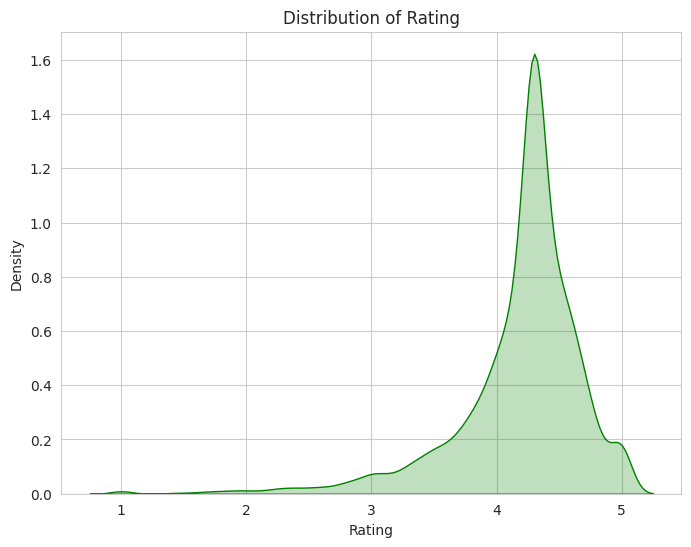

In [ ]:
# setting plot size and background
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')

# distribution plot
sns.kdeplot(apps_data.Rating, color="Green", shade = True)
plt.title("Distribution of Rating");

In [ ]:
# average rating
avg_rating = apps_data["Rating"].mean()
print(f"Overall average rating is {round(avg_rating,2)}")

Overall average rating is 4.18


### **Observation:**
* Average rating of applications in play store is around 4.18, which is quite high.
*  Most of the ratings are above 3.5 which means most of the apps are being liked by the users.

* **We can say that rating can be a variable to identify app success.**


#Number of apps in each category?

In [ ]:
# preparing data and sorting :
category_df= apps_data['Category'].value_counts().reset_index().rename(
              columns={'index':'Category', 'Category':'Total_apps'})

sorted_df= category_df.sort_values(by=["Total_apps"], ascending=True)

In [ ]:
# count of categories :
print(f"Number of categories in play store: {category_df.shape[0]}")

Number of categories in play store: 33


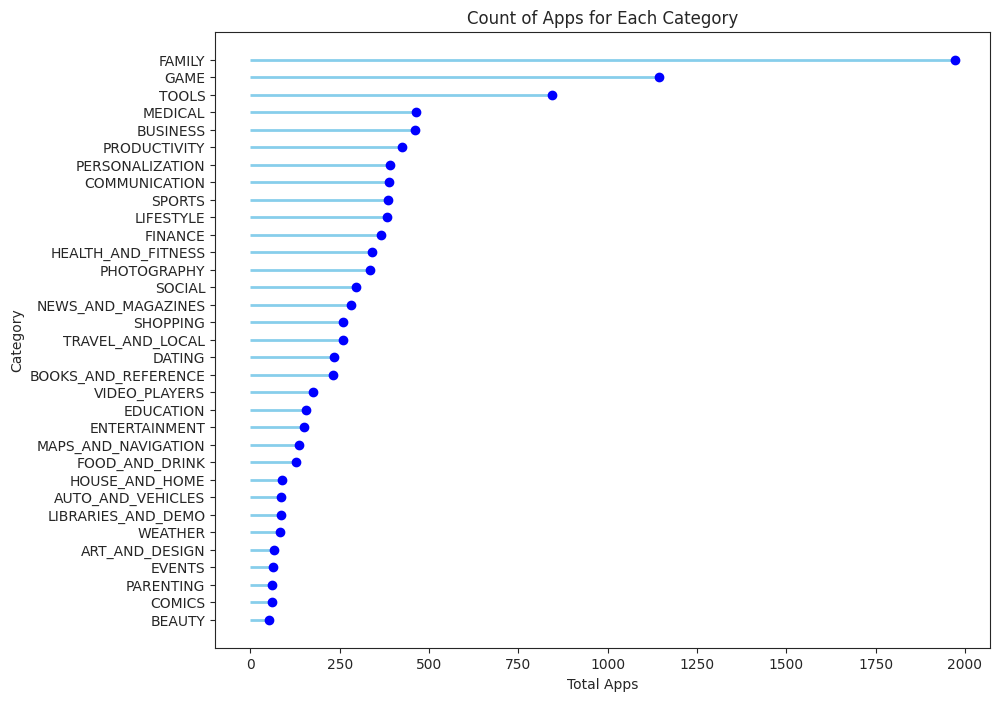

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Load datasets
# ---------------------------
apps_df = pd.read_csv('/content/drive/My Drive/2026/Capstone Project/Module II Numerical Programming in Python/Play Store Data.csv')
reviews_df = pd.read_csv('/content/drive/My Drive/2026/Capstone Project/Module II Numerical Programming in Python/User Reviews.csv')

# ---------------------------
# 2. Count apps per category
# ---------------------------
category_count = (
    apps_df
    .groupby('Category')
    .size()
    .sort_values(ascending=True)
)

# ---------------------------
# 3. Plot lollipop chart
# ---------------------------
sns.set_style('ticks')
plt.figure(figsize=(10, 8))

plt.hlines(
    y=category_count.index,     # Category is index
    xmin=0,
    xmax=category_count.values,
    color='skyblue',
    linewidth=2
)

plt.plot(
    category_count.values,
    category_count.index,
    'o',
    color='blue'
)

# ---------------------------
# 4. Titles and labels
# ---------------------------
plt.title('Count of Apps for Each Category')
plt.xlabel('Total Apps')
plt.ylabel('Category')

plt.show()


Observation:
There are 33 categories present in play store.

Family category is at the top having highest number of apps nearing 1750 apps.

Game and Tools categories are behind Family category having more than 750 apps.

We can say that apps in Family and Game category are common and have high chances of being successful.

#Which category apps are installed most?

In [ ]:
# prepare data and sort
temp1_df = apps_data.groupby('Category').agg(
                            {'App':'count','Installs':'sum'}).reset_index()

temp1_df['Avg_Installs'] = temp1_df.apply(lambda x: x['Installs']/x['App'], axis=1)
temp1_df.sort_values('Avg_Installs', ascending=False, inplace=True)

In [ ]:
# check data
temp1_df.head()

,Category,App,Installs,Avg_Installs
14,GAME,873,11532464253,1.321015e+07
9,ENTERTAINMENT,64,637960000,9.968125e+06
6,COMMUNICATION,242,1817943051,7.512161e+06
31,VIDEO_PLAYERS,127,866767720,6.824943e+06
24,PHOTOGRAPHY,222,1493897655,6.729269e+06


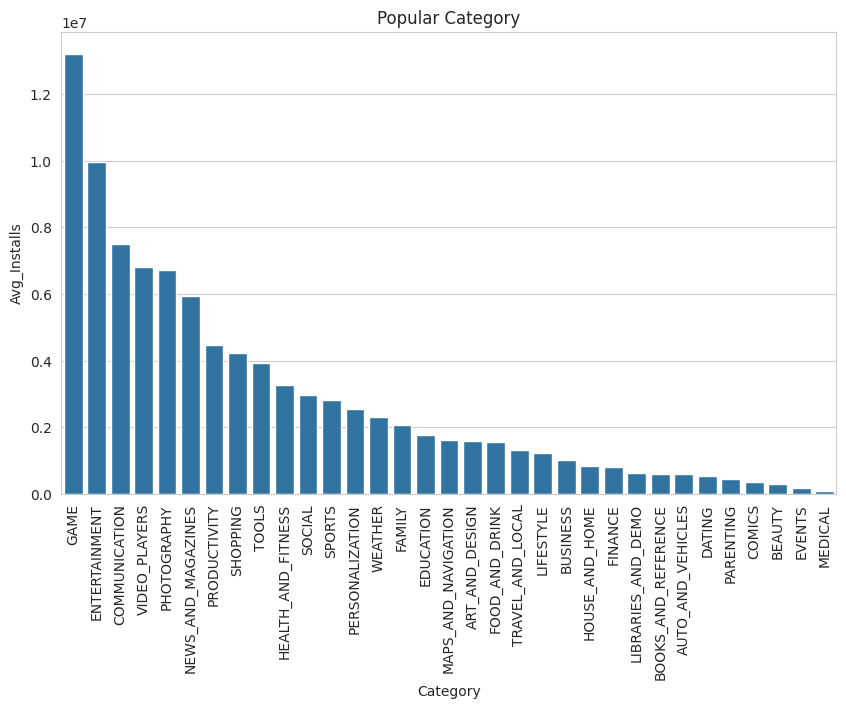

In [ ]:
# setting plot size and background
plt.figure(figsize= (10,6))
sns.set_style("whitegrid")

# bar plot
sns.barplot(data= temp1_df, x="Category", y="Avg_Installs")

# setting title and label
plt.title("Popular Category")
plt.xticks(rotation=90);

Observation:
We saw that Family category has high number of apps but when it comes to installs Game is the most popular category.

Entertainment, Communication, Video players, Photography categories are also popular among smartphone users.

Medical category has least number of installs and it's interesting that it has more number of apps than many other categories which has more installs.

# Age groups do different categories target?

In [ ]:
# prepare data to get count of apps per Category and Content Rating
df1 = apps_data.groupby(["Category", "Content Rating"]).count().reset_index()
df1 = df1[["Category", "Content Rating", "App"]]
temp2_df = df1.pivot(columns="Content Rating", index="Category", values="App")

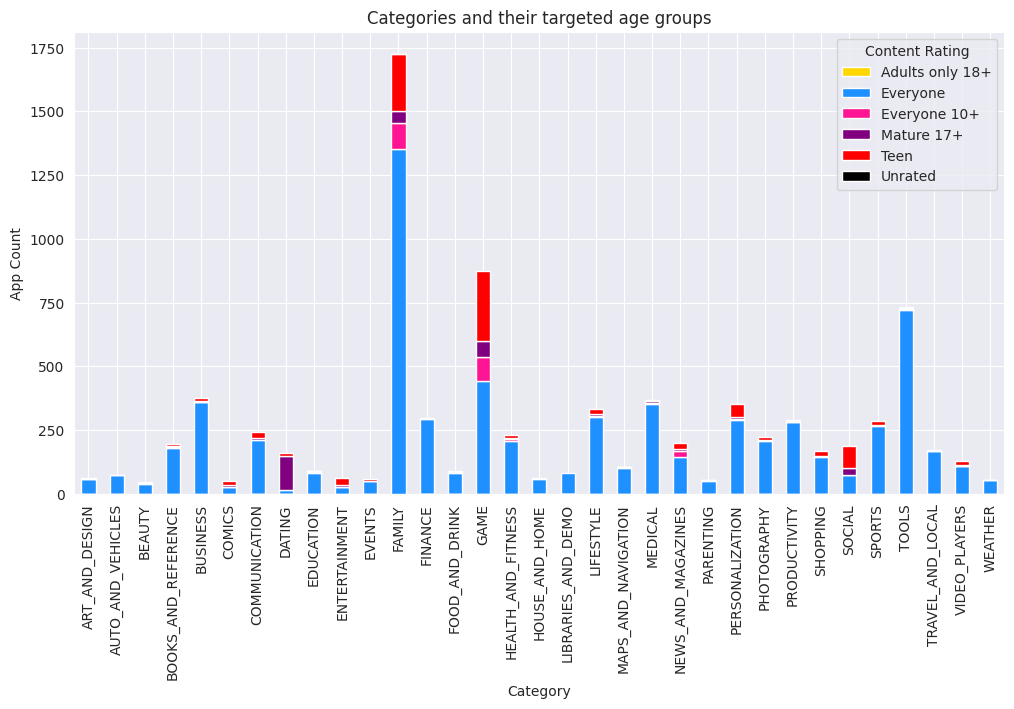

In [ ]:
# setting plot background
sns.set_style("darkgrid")

# bar chart
color_lst = ["gold", "dodgerblue", "deeppink", "purple", "red", "black"]
temp2_df.plot(kind="bar", stacked=True, color= color_lst, figsize=(12,6))

# setting label and title
plt.ylabel("App Count")
plt.title("Categories and their targeted age groups");

Observation:
Every Category targets almost all age group audiences.

Dating Category has over 90% of apps mostly for Mature audience.

Family and Game categories have high number of apps so they contain more apps which are rated for teen and mature audiences.

Categories such as Tools, Finance, Books and Reference, Education, Weather mostly targets everyone.

#What percentage of apps are paid?

In [ ]:
# data to plot
data = apps_data['Type'].value_counts()

# displaying free and paid apps
print(f"Number of free apps:{data['Free']}")
print(f"Number of paid apps:{data['Paid']}")

Number of free apps:7748
Number of paid apps:685


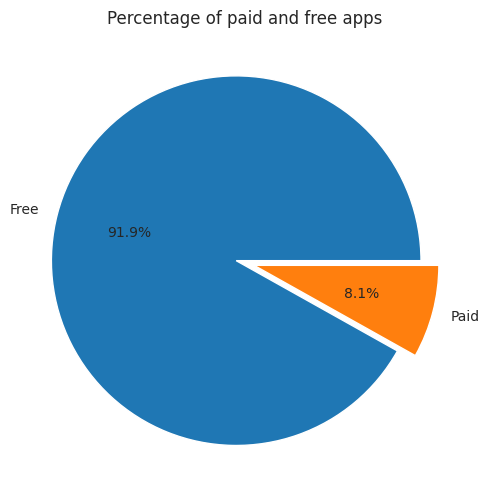

In [ ]:
# Pie Chart
plt.figure(figsize=[10,6])

labels = data.keys()
plt.pie(x=data, labels=labels, autopct="%.1f%%", explode=[0.05]*2)
plt.title("Percentage of paid and free apps");

Observation:
From the above chart, we can see that 91.9% of apps in the play store dataset are free apps and 8.1% apps are paid.

There are very less paid apps as compare to free apps.

# Which type of apps are users willing to pay for?

In [ ]:
# extracting paid apps data
paid = apps_data[apps_data["Type"] == "Paid"]
paid_apps = paid.groupby("Category")["Type"].value_counts().unstack().reset_index()

In [ ]:
# merging dataframes
# Sort by index (Category)
category_df.sort_index(inplace=True)

# Merge using index
category_df = category_df.merge(
    paid_apps,
    left_index=True,
    right_index=True,
    how="outer"
)

category_df.fillna(0, inplace=True)

In [ ]:
# getting category wise paid apps percentage
import pandas as pd

# ---------------------------
# 1. Load dataset
# ---------------------------
apps_df = pd.read_csv('/content/drive/My Drive/2026/Capstone Project/Module II Numerical Programming in Python/Play Store Data.csv')

# ---------------------------
# 2. Total apps per category
# ---------------------------
total_apps = apps_df.groupby('Category').size().reset_index(name='Total_apps')

# ---------------------------
# 3. Paid apps per category
# ---------------------------
paid_apps = (
    apps_df[apps_df['Type'] == 'Paid']
    .groupby('Category')
    .size()
    .reset_index(name='paid_apps')
)

# ---------------------------
# 4. Merge both
# ---------------------------
category_df = total_apps.merge(paid_apps, on='Category', how='left')
category_df['paid_apps'].fillna(0, inplace=True)

# ---------------------------
# 5. % of paid apps (RECTIFIED)
# ---------------------------
category_df['%_of_paid_apps'] = round(
    (category_df['paid_apps'] / category_df['Total_apps']) * 100,
    2
)

category_df.head()


/tmp/ipython-input-2278209954.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  category_df['paid_apps'].fillna(0, inplace=True)


,Category,Total_apps,paid_apps,%_of_paid_apps
0,ART_AND_DESIGN,66,3.0,4.55
1,AUTO_AND_VEHICLES,85,3.0,3.53
2,BEAUTY,53,0.0,0.00
3,BOOKS_AND_REFERENCE,231,28.0,12.12
4,BUSINESS,460,14.0,3.04


In [ ]:
# display data
category_df.head()

,Category,Total_apps,paid_apps,%_of_paid_apps
0,ART_AND_DESIGN,66,3.0,4.55
1,AUTO_AND_VEHICLES,85,3.0,3.53
2,BEAUTY,53,0.0,0.00
3,BOOKS_AND_REFERENCE,231,28.0,12.12
4,BUSINESS,460,14.0,3.04


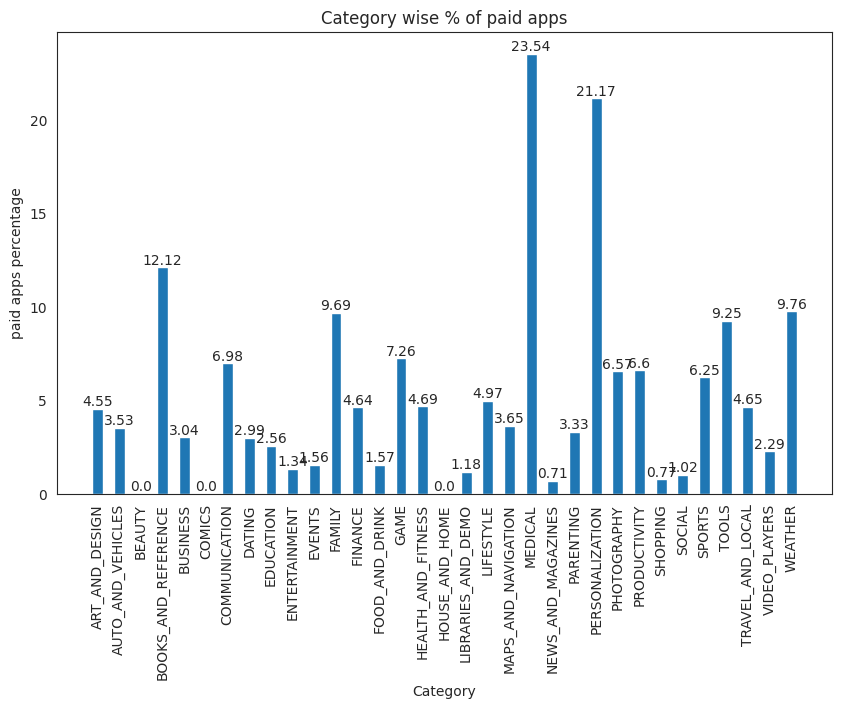

In [ ]:
# setting plot size and background
plt.figure(figsize=(10,6))
sns.set_style("white")

# bar plot
plt.bar(category_df['Category'], category_df['%_of_paid_apps'], width=.5)

for i, val in enumerate(category_df['%_of_paid_apps'].values):
    plt.text(i, val, float(val), horizontalalignment='center',
             verticalalignment='bottom', fontdict={'fontweight':500, 'size':10})

plt.title('Category wise % of paid apps')
plt.xlabel('Category')
plt.ylabel('paid apps percentage')
plt.xticks(rotation=90);

Observation:
Personalization and Medical category have high rate of paid apps as compared to other categories having approximately 22% and 20% of their total apps are paid. Books and Reference category is behind them.

We can say that this type of apps generally do well as paid apps, since value is in the apps functionality.

Beauty, Comics and House and home categories do not have any paid app.

# Are paid apps get better rating?

In [ ]:
# getting the data to plot
free_apps_rating = apps_data[apps_data['Type'] == "Free"]['Rating']
paid_apps_rating = apps_data[apps_data['Type'] == "Paid"]['Rating']

/tmp/ipython-input-1431327978.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(free_apps_rating, shade=False, color='crimson')
/tmp/ipython-input-1431327978.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(paid_apps_rating, shade=False, color='blue')


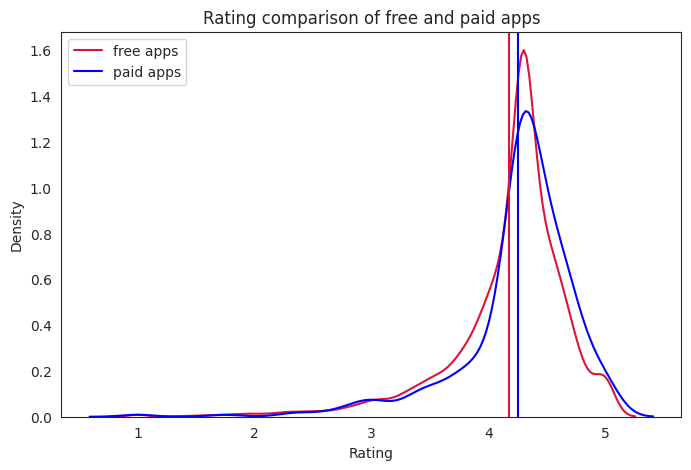

In [ ]:
# setting plot size and background
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))

# average ratings
meanx = free_apps_rating.mean()
meany = paid_apps_rating.mean()

# Distribution plot
ax = sns.kdeplot(free_apps_rating, shade=False, color='crimson')
ax = sns.kdeplot(paid_apps_rating, shade=False, color='blue')

# ploting average lines
plt.axvline(x = meanx, color = 'crimson', label = 'free apps')
plt.axvline(x = meany, color = 'blue', label = 'paid apps')

# set title and legend
plt.title("Rating comparison of free and paid apps")
plt.legend(loc = 'upper left');

In [ ]:
# Average ratings for free and paid apps
print(f"The average rating free apps get is {round(meanx,2)}")
print(f"The average rating paid apps get is {round(meany,2)}")

The average rating free apps get is 4.18
The average rating paid apps get is 4.26


Observation:
The average rating paid apps get is 4.26 as compare to 4.18 for free apps.

There is a slight edge for paid apps this can be because paid apps may have more loyal and dedicated users.

## **Correlation matrix**


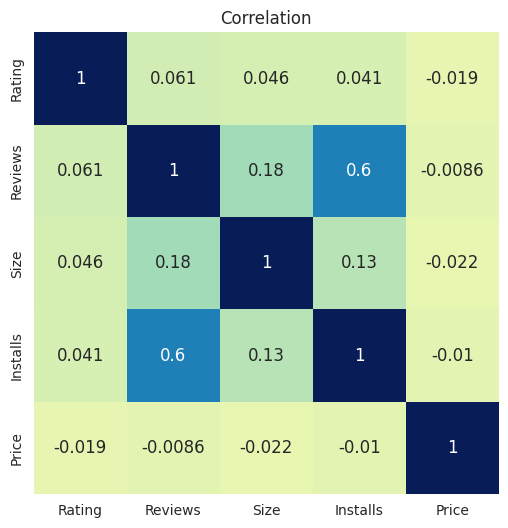

In [ ]:
# calculating correlation between each pair of variable
# Correlation matrix using numeric columns only
corr_matrix = apps_data.select_dtypes(include=np.number).corr()

# Correlation heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="YlGnBu",
    cbar=False,
    vmin=-0.2,
    vmax=1,
    annot_kws={"size": 12}
)

plt.title("Correlation")
plt.show()

Observation:
Installs and Reviews have the strongest correlation. There is no strong correlation found between other features.

Price has a negative correlation with all other features but it is very weak and it can be negligible.

There is small linear relation of Installs with Size of an app which we will analyze further.

# Does rating change with increasing price?

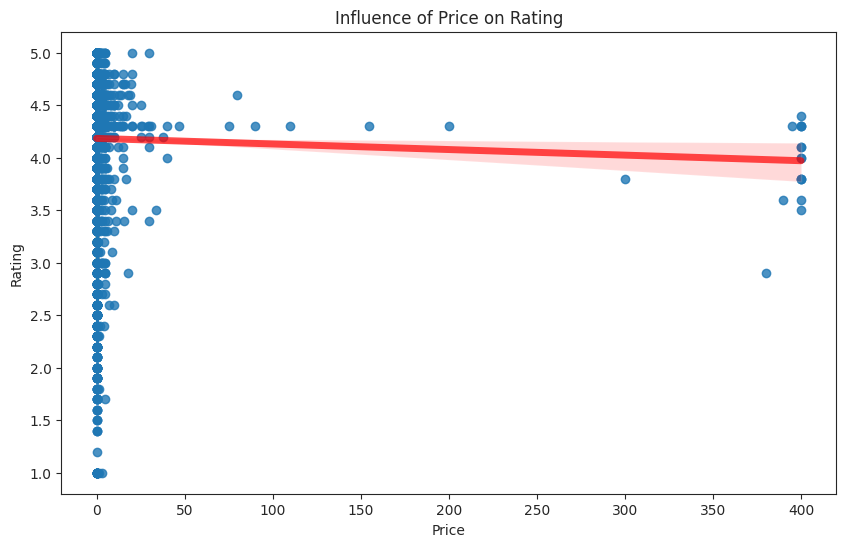

In [ ]:
# setting plot size and background
plt.figure(figsize=(10,6))
sns.set_style("ticks")

# scatterplot Price v/s Rating
sns.regplot(x="Price", y="Rating", data=apps_data,
            line_kws={"color":"r", "alpha":0.7, "lw":5})

# set title
plt.title("Influence of Price on Rating");

Observation:
Most of the apps have price below $100 and above $350.

The red linear regression line in above plot indicates there is a negative relation between app price and rating.

We can conclude that as the price increases their is a slight drop in ratings of the app.

# Does the size of an app influence the number of downloads?

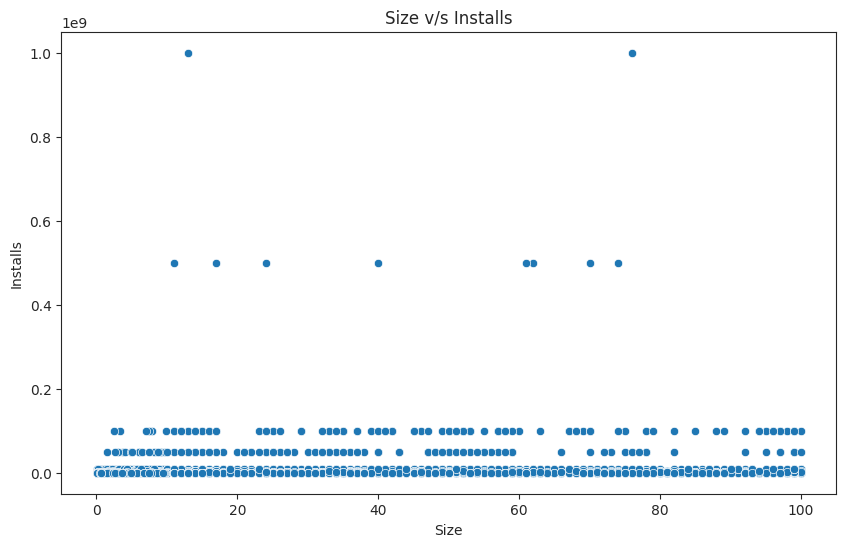

In [ ]:
# scatter plot Size v/s Installs
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(x="Size", y="Installs", data=apps_data)
plt.title("Size v/s Installs");

/tmp/ipython-input-1526088238.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(apps_data['Installs']);


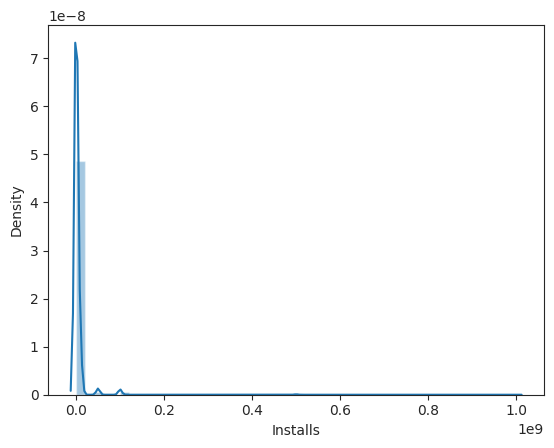

In [ ]:
# distrbution of installs
sns.distplot(apps_data['Installs']);

We have columns like Installs which range from 0 to 1,000,000,000, and even more; while Size column which ranges from 0 to 100(at the most). Thus, number of Installs are more times larger than Size.

We can observe that Installs are highly skewed and its difficult from above to find any correlation of Size and Installs. So, to give importance to both Size, and Installs, we need feature transformation.

The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

This transformation reduces the impact of both too-low as well as too-high values.

In [ ]:
# Log Trasformation of column Installs
apps_data["log_installs"] = np.log(apps_data["Installs"])
apps_data.head(2)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,log_installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,9.210340
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,13.122363


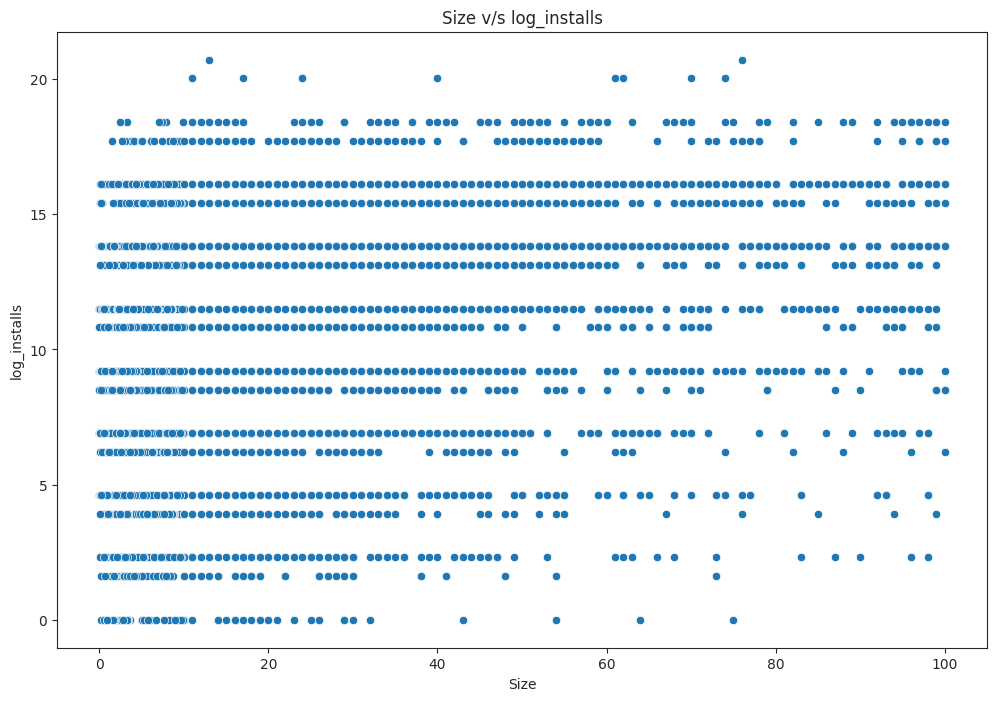

In [ ]:
# scatter plot Size v/s log_installs
plt.figure(figsize=(12,8))
sns.scatterplot(x="Size", y="log_installs", data=apps_data)

# set title
plt.title("Size v/s log_installs");

Observation:
Apps having Size between 0 to 20 are installed more as observed from above.

Looking at the plot the apps with large size are installed less as compared to small sized apps.

Users prefer apps that require less space and load faster. We can conclude that app size may influence the number of installations of the app.

# Do higher rated apps attract more users?

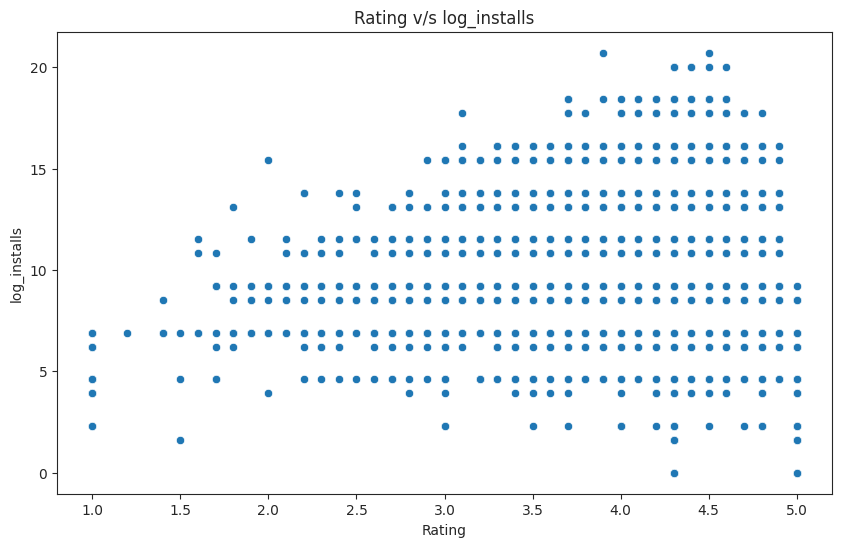

In [ ]:
# scatter plot Rating v/s log_installs
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="Rating", y="log_installs", data=apps_data)

# set title
plt.title("Rating v/s log_installs");

Observation:
Above graph shows positive relationship between Rating and Installation.

The higher rating does contribute to more installations.

People have a natural tendency to trust the opinion of those around them. This is the reason why users prefer highly rated apps to download.

Why are there apps with high ratings but low installation? It seems those apps are good but few people have used them.

# How reviews affect users decision to download apps?

/tmp/ipython-input-103331720.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(apps_data['Reviews']);


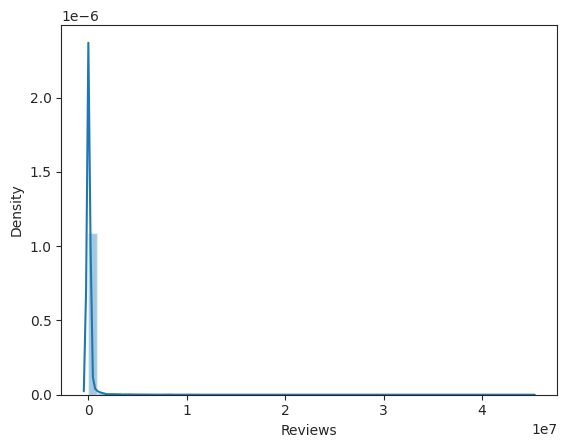

In [ ]:
# distribution of Reviews
sns.distplot(apps_data['Reviews']);

In [ ]:
# log transformation of Reviews column
apps_data['log_reviews'] = np.log(apps_data['Reviews'])
apps_data.head(2)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,log_installs,log_reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,9.210340,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,13.122363,6.874198


Text(0.5, 1.0, 'Installs v/s Reviews')

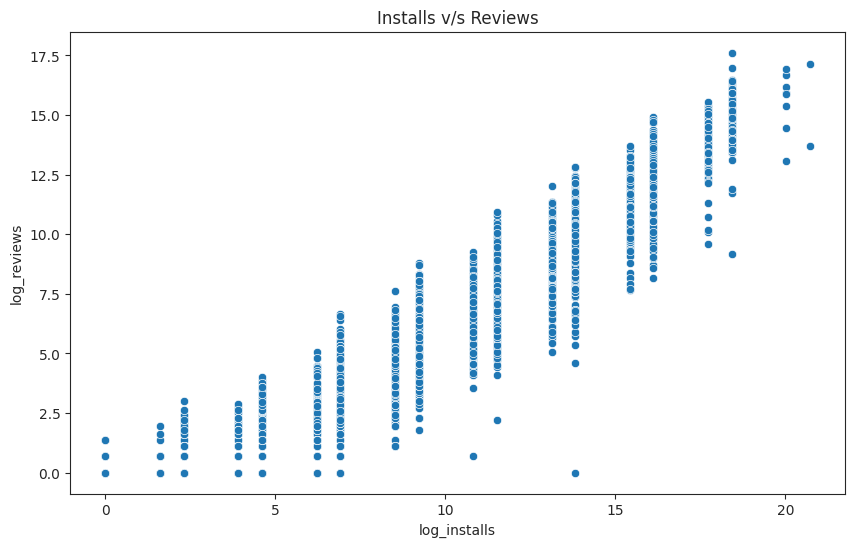

In [ ]:
# scatter plot installs v/s reviews
plt.figure(figsize=(10,6))

sns.scatterplot(x="log_installs", y="log_reviews", data=apps_data)
plt.title("Installs v/s Reviews")

Observation:
Graph shows incremental positive relation between Reviews and Installs.

We can say that popular apps which have high number of installs receive more reviews and this attracts more new users.

When app store visitors want to know if an app does what it’s supposed to do and works well, they’ll check the reviews.

# Are app updates important?

In [ ]:
# getting year of update
apps_data['Update_Year'] = pd.DatetimeIndex(apps_data['Last Updated']).year
apps_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,log_installs,log_reviews,Update_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,9.210340,5.068904,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,13.122363,6.874198,2018


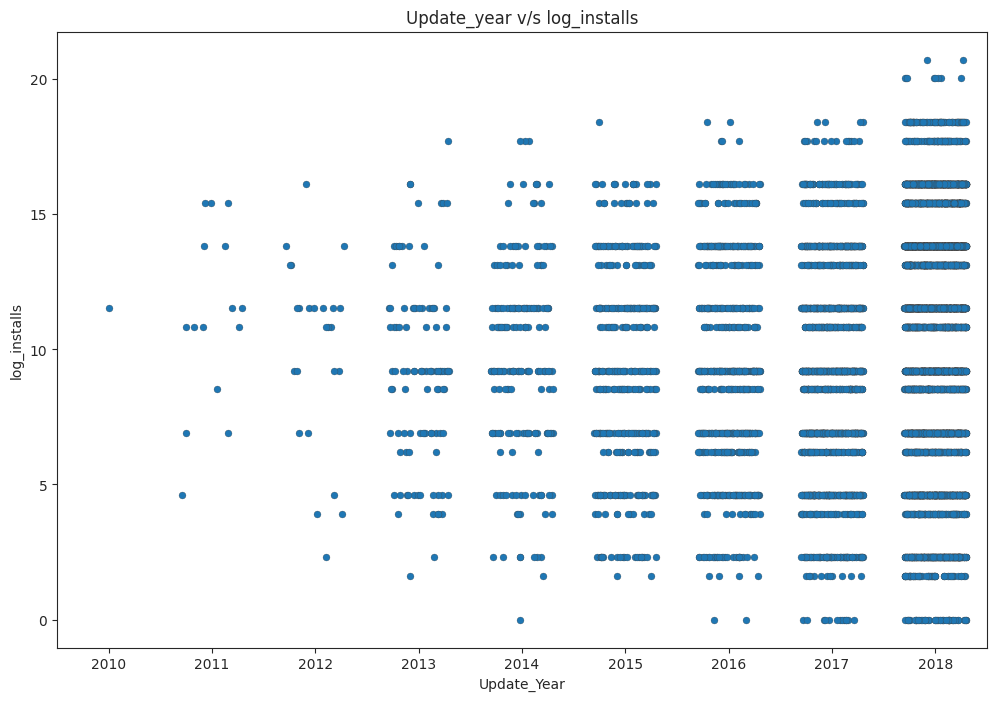

In [ ]:
# stripplot Update_year v/s log_installs
plt.figure(figsize=(12,8))

sns.stripplot(data =apps_data, x="Update_Year", y="log_installs",
              jitter=0.3, size=5, linewidth=.2)

plt.title("Update_year v/s log_installs");

Observation:
We can see from above plot that most of the apps get frequent updates and they are also installed more.

There are very less apps which got updates in 2010, 2011 and 2012 year.

We can say that those developers who make their app better over period of time have great chance of success.

For further analysis we will need some more data which we will get from the secondary dataset which contains the information about the reviews given by the users for the apps. But before using it we should have a glance at the dataset and do neccesary steps for making the dataset more usefull.

Now look at the reviews dataset

In [ ]:
# copying the dataset for cleaning and analysis
reviews_data = reviews_df.copy()

In [ ]:
# top 5 rows
reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# basic info
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


User reviews dataset contain 5 columns namely App, Translated Review, Sentiment, Sentiment Polarity and Sentiment Subjectivity. Different users express their thoughts and feelings about the app and they are stored in the Translated_Review column and by analysing the emotion of the text the other three columns are generated.

Sentiment analysis is the process of detecting positive or negative sentiment in text. Sentiment column has three unique values namely Positive, Negative and Neutral. It describes the sentiment of the user giving the review.

Sentiment Polarity indicates how negative or positive the overall review analyzed is. Anything below a score of 0 we tag as negative, anything above 0 we tag as positive and 0 as neutral.

Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

# Cleaning 2nd data set

In [ ]:
# looking for the missing values
reviews_data.isna().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [ ]:
# droping unnecessary columns and missing values
reviews_data.drop(columns= ["Translated_Review","Sentiment"], axis= 1, inplace= True)
reviews_data.dropna(inplace= True)

In [ ]:
# merging reviews dataset with apps dataset
temp3_df = pd.merge(apps_data, reviews_data, on="App", how ="inner")

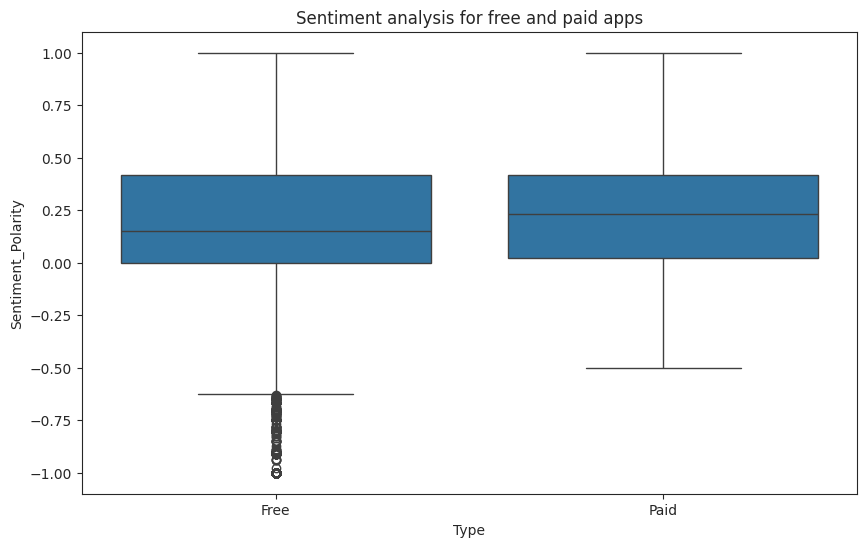

In [ ]:
# setting plot size
plt.figure(figsize=(10,6))

# Boxplot for sentiment analysis
sns.boxplot(x ="Type", y ="Sentiment_Polarity", data= temp3_df)
plt.title("Sentiment analysis for free and paid apps");

Observation:
Free app gets more negative reviews as indicated by the outliers on the negative side.

Median polarity is higher for paid apps as compared to free apps because users are generally more loyal to Apps they pay for.

We can say that paid apps have better quality than free apps.

# Are sentiment influences the final rating of the app

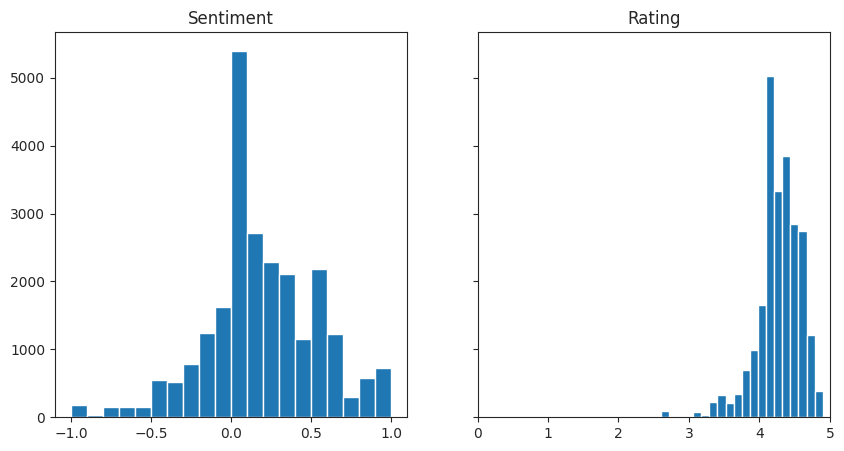

In [ ]:
# create the plot for the histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)

# create the histograms
ax[0].hist(temp3_df["Sentiment_Polarity"], bins=20)
ax[1].hist(temp3_df["Rating"], bins=20)
ax[1].set_xlim(0, 5)

# add titles
ax[0].set_title("Sentiment")
ax[1].set_title("Rating")

plt.show()

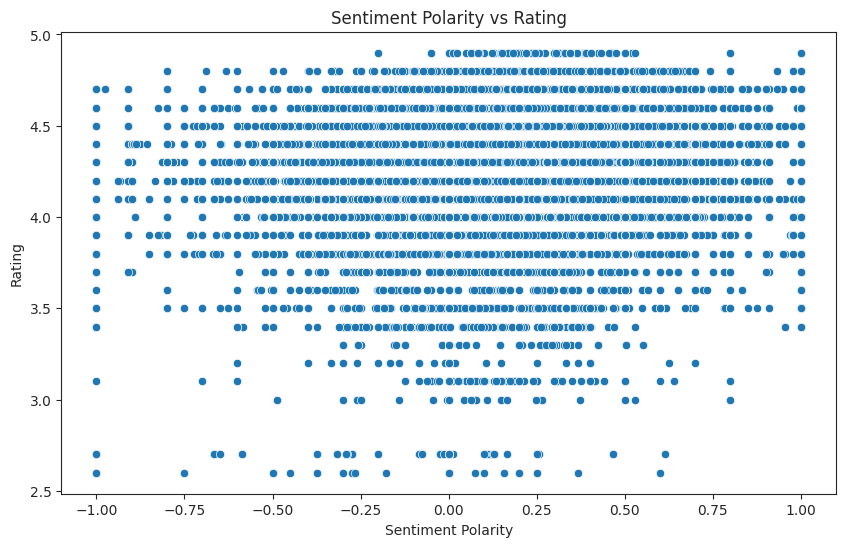

In [ ]:
# Scatter plot: Sentiment Polarity vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=temp3_df['Sentiment_Polarity'],
    y=temp3_df['Rating']
)
plt.title("Sentiment Polarity vs Rating")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Rating")
plt.show()


Observation:
Looking at the histograms, we can see a positive trend for both columns. In the Sentiment aspect, the majority of the values are above neutral (0), at around 0.2

For the Rating column, most of the apps have got ratings above 3.5

We can say that positive reviews about the app can strengthen new user's decision to download.

# Conclusion

After analysis we have got answers to some ofquestions. We visualized trends and relations between features of apps using different types of plots such as bar graph, distribution plot, scatter plot, box plot, pie chart and more. Our analysis can be useful for future app developers and marketers in making their app a big success.

We can conclude that developers should know which type of app to develop and what will be the targeted audience. If an app can offer a premium experience to users, it might be considered keeping the app paid and offering a free trial to capture more downloads. Size of an app plays an important role in attracting users. High ratings and more reviews also attract more users. Updating the app, adding new features and fixing bugs can improve user experience and happy users attract more new users. An app getting a rating above 3.5 gets positive reviews. In this way, our analysis shows how these factors can contribute to app engagement and success.